In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
data = pd.read_csv('../input/insurance/insurance.csv')

In [2]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


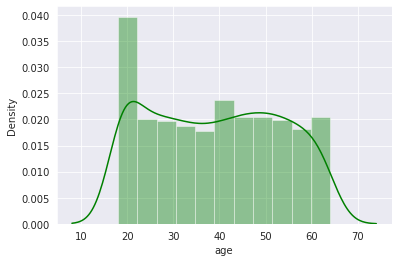

In [8]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
sns.distplot(data['age'],color='g')
plt.show()

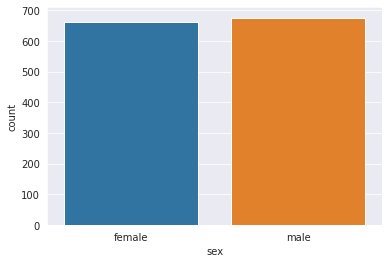

In [9]:
sns.countplot(data['sex'])
plt.show()

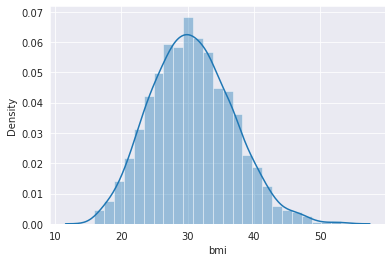

In [10]:
sns.distplot(data['bmi'])
plt.show()

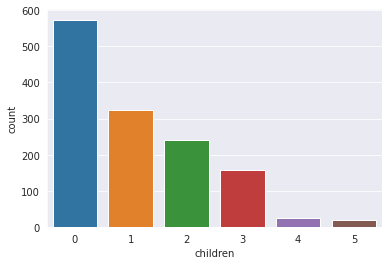

In [11]:
sns.countplot(data['children'])
plt.show()

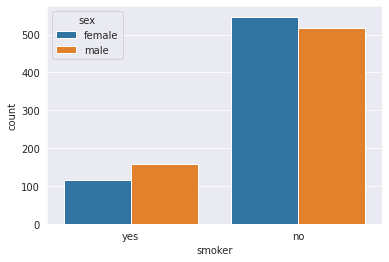

In [12]:
sns.countplot(x='smoker',hue='sex',data=data)
plt.show()

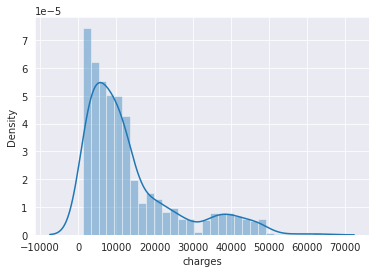

In [13]:
sns.distplot(data['charges'])
plt.show()

In [14]:
data['charges'].min()

1121.8739

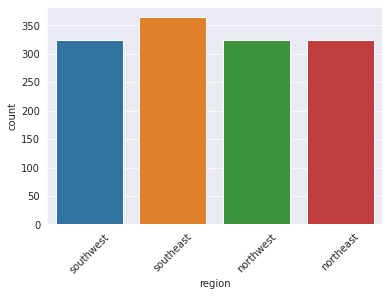

In [15]:
sns.countplot(data['region'])
plt.xticks(rotation=45)
plt.show()

<Figure size 720x720 with 0 Axes>

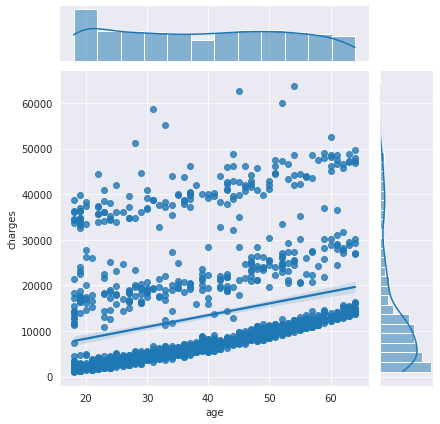

In [16]:
plt.figure(figsize=(10,10))
sns.jointplot(x='age',y='charges',data=data,kind='reg')
plt.show()

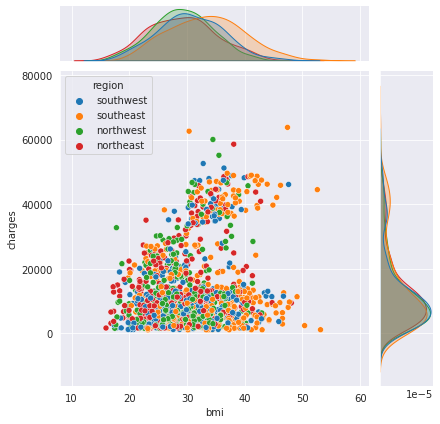

In [17]:
sns.jointplot(x='bmi',y='charges',hue='region',data=data)
plt.show()

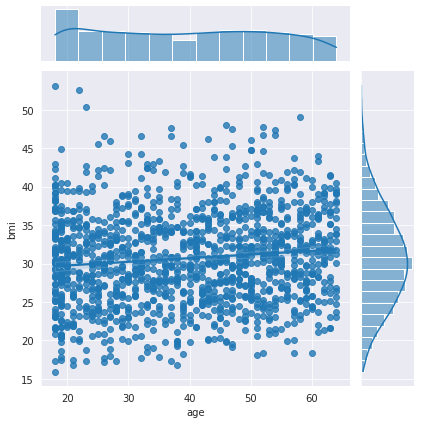

In [18]:
sns.jointplot(x='age',y='bmi',data=data,kind='reg')
plt.show()

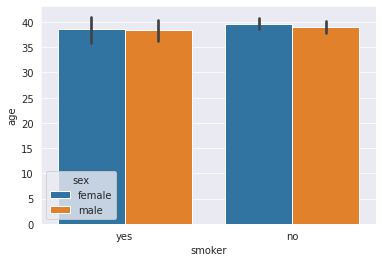

In [19]:
sns.barplot(x='smoker',y='age',hue='sex',data=data)
plt.show()

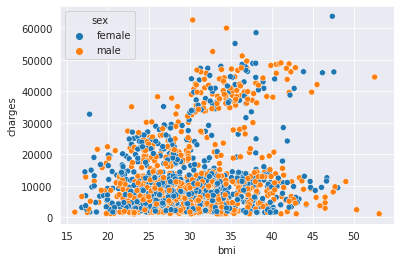

In [20]:
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data)
plt.show()

In [21]:
x = data.drop(columns='charges',axis=1)
y = data['charges']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


In [23]:
x_train.head()

,age,sex,bmi,children,smoker,region
297,47,male,25.410,1,yes,southeast
778,35,male,34.320,3,no,southeast
451,30,male,24.130,1,no,northwest
1281,47,female,27.645,2,yes,northwest
1235,26,male,31.065,0,no,northwest


In [24]:
y_train.head()

297     21978.67690
778      5934.37980
451      4032.24070
1281    24535.69855
1235     2699.56835
Name: charges, dtype: float64

In [25]:
x_test.head()

,age,sex,bmi,children,smoker,region
494,21,male,25.70,4,yes,southwest
314,27,female,31.40,0,yes,southwest
531,62,female,31.73,0,no,northeast
561,54,female,32.68,0,no,northeast
183,44,female,26.41,0,no,northwest


In [26]:
from catboost import CatBoostRegressor

In [27]:
cat_features=[1,4,5]

In [28]:
cat=CatBoostRegressor(iterations=100,loss_function='RMSE',cat_features=cat_features)
cat.fit(x_train,y_train)

Learning rate set to 0.269043
0:	learn: 9560.2613074	total: 56.8ms	remaining: 5.63s
1:	learn: 8021.7059210	total: 58.4ms	remaining: 2.86s
2:	learn: 6847.3158139	total: 59.7ms	remaining: 1.93s
3:	learn: 6096.5516684	total: 61.7ms	remaining: 1.48s
4:	learn: 5551.2051141	total: 63.2ms	remaining: 1.2s
5:	learn: 5225.9422551	total: 64.5ms	remaining: 1.01s
6:	learn: 4981.0896912	total: 65.7ms	remaining: 873ms
7:	learn: 4833.6430143	total: 66.9ms	remaining: 770ms
8:	learn: 4720.8723218	total: 67.9ms	remaining: 687ms
9:	learn: 4624.8306767	total: 69.2ms	remaining: 623ms
10:	learn: 4563.0830289	total: 70.5ms	remaining: 570ms
11:	learn: 4513.8466099	total: 71.6ms	remaining: 525ms
12:	learn: 4462.9596933	total: 72.7ms	remaining: 486ms
13:	learn: 4432.1571776	total: 73.7ms	remaining: 453ms
14:	learn: 4401.6346210	total: 74.8ms	remaining: 424ms
15:	learn: 4379.7547249	total: 75.8ms	remaining: 398ms
16:	learn: 4375.9622430	total: 76.3ms	remaining: 372ms
17:	learn: 4363.7385746	total: 77.3ms	remainin

In [29]:
y_pred=cat.predict(x_test)
y_pred[:5]

array([14970.31609616, 36269.02926603, 15520.80891384, 13554.89697496,
        8068.75860124])

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8821047724972276